# 🏆 Predicting Methane Adsorption in Porous Materials

[*"In Silico Design of 2D and 3D Covalent Organic Frameworks for Methane Storage Applications"*](https://archive.materialscloud.org/record/2018.0003/v2) introduces a comprehensive database of 69,840 covalent organic frameworks (COFs), each virtually assembled from 666 unique organic linkers and synthesized via four distinct methods. Using grand-canonical Monte Carlo simulations, the study evaluated the methane storage capacity of these frameworks, identifying top-performing materials, outperforming the best methane storage materials currently available.

This notebook offers a hands-on experience for participants to learn machine learning by analyzing and modeling this real-world dataset. Participants will apply ML techniques to uncover patterns and develop predictive models for COFs' methane storage capacity. The full dataset is available on [Materials Cloud](https://archive.materialscloud.org/record/2018.0003/v2).

- **voidFraction**: Porosity or percentage of void space in the material.
- **supercellVolume**: Volume of the supercell structure used for modeling.
- **density**: Density of the material.
- **cell_a, cell_b, cell_c**: Supercell dimensions in angstroms.
- **alpha_deg, beta_deg, gamma_deg**: Angles of the supercell structure in degrees.
- **num_carbon, num_fluorine, etc.**: Counts of specific atoms (e.g., carbon, fluorine).
- **largest_incl_sphere**: Largest sphere that fits within the material.
- **largest_free_sphere**: Largest sphere that can move freely within the material.
- **largest_incl_sphere_along_path**: Largest sphere that can fit along a path in the material.
- **`highUptake_mol` (Target Variable)**: Amount of methane adsorbed within the porous material.

<figure align="center" class="image">
  <img src="https://www.zeoplusplus.org/spheres.png">
  <figcaption>(1) the largest included sphere (Di), (2) the largest free sphere (Df), and (3) the largest included sphere along the free sphere path (Dif).</figcaption>
</figure>

---

## 🤔 What’s the Plan?

We’ll walk through a complete machine learning workflow, covering everything from exploration to deployment. Here’s our approach:

1. **Exploratory Data Analysis (EDA)**: We'll begin by loading the dataset and performing thorough exploratory data analysis to uncover patterns, detect anomalies, and identify potential relationships between features. This will guide our data preprocessing and modeling decisions.
2. **Data Preprocessing**: Based on the findings from EDA, we’ll handle missing values, normalize or scale the data, address outliers, and remove irrelevant features to prepare the dataset for modeling.
3. **Build and Evaluate the Model**: Next, we'll train multiple machine learning models, evaluate their performance using appropriate metrics, and select the best-performing model for our task.
4. **Test on Previously Unseen Data**: Finally, we'll validate the selected model by testing it on a separate, previously unseen dataset to assess its generalization ability and performance in real-world scenarios.

> 💡 Guidance blocks like this will appear throughout the notebook to help you implement the necessary functionality and move forward in the challenge.

> ✍️ Blocks like this one will require you to replace the placeholder text with your own observations and insights.


## 📦 Installing the Necessary Dependencies

We first need to install the necessary python dependencies:

- [`pandas`](https://github.com/pandas-dev/pandas) is a powerful data manipulation and analysis library for Python. It provides data structures, like DataFrames, which make it easy to work with structured data, similar to tables in Excel or SQL. You can use pandas to clean, transform, and analyze data effectively.
- [`scikit-learn`](https://github.com/scikit-learn/scikit-learn) is a widely used machine learning library in Python. It offers a range of tools for building and evaluating machine learning models, including classification, regression, clustering, and dimensionality reduction. Scikit-learn is great for experimenting with models and understanding core ML concepts.
- [`matplotlib`](https://github.com/matplotlib/matplotlib) is a foundational plotting library in Python. It provides extensive control over plots, making it useful for creating static, high-quality visuals for data analysis. Matplotlib is also the base upon which many other plotting libraries, like seaborn, are built.
- [`seaborn`](https://github.com/mwaskom/seaborn) is a data visualization library built on top of Matplotlib. It provides a high-level interface for drawing attractive statistical graphics and is especially useful for data exploration and creating visually appealing plots with minimal code.
- [`tqdm`](https://github.com/tqdm/tqdm) is a Python library used for creating progress bars, which make it easy to monitor the progress of loops or tasks in your code. It’s especially handy when running long operations, like data processing or training machine learning models, as it gives a real-time view of how much work is left. You can add tqdm to any iterable, and it will automatically display a progress bar that updates as the loop iterates.

In [1]:
!python -m pip install pandas==2.2.3 scikit-learn==1.5.2 tqdm==4.67.0 matplotlib==3.9.2 seaborn==0.13.2

## 🔍 Exploratory Data Analysis (EDA)

Exploratory Data Analysis, or EDA, involves visually and statistically examining the data to uncover patterns, detect anomalies, and form initial insights. This process will guide our data preparation and modeling strategy, helping us make informed decisions as we move forward.

### Overview

> 💡 Start by loading the dataset with [`pandas.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [2]:
import pandas as pd

df = pd.read_csv("./dataset.csv")

target_variable = "highUptake_mol"
features = set(df.columns).difference(target_variable)

>💡 Use [`pandas.DataFrame.describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) to obtain key statistics like mean, median, and standard deviation, which will help you understand the distribution of numerical features.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
voidFraction,66881.0,0.881462,0.074180,0.089861,0.851188,0.900065,0.932422,0.983257
supercellVolume,66852.0,103690.840410,83859.580319,16781.738390,47567.591025,76868.499447,131877.969830,776909.376696
density,66887.0,238.065651,128.400720,37.143765,143.246267,207.512148,305.240249,1187.930244
highUptake_mol,66812.0,33.342640,10.352052,0.237056,26.803815,32.293691,38.298023,93.776479
cell_a,66796.0,46.894708,14.153704,24.100200,35.298900,44.530600,56.246700,130.497000
cell_b,66785.0,46.199166,14.253275,23.589400,34.531900,43.350600,54.986600,130.530000
cell_c,66872.0,43.973505,16.003227,23.550900,30.570800,39.956000,52.841100,150.752000
alpha_deg,66812.0,89.992894,0.749517,51.478700,90.000000,90.000000,90.000000,114.744000
beta_deg,66849.0,89.995228,0.360698,75.146600,90.000000,90.000000,90.000000,110.943000
gamma_deg,66853.0,100.128233,14.242059,16.883100,90.000000,90.000000,120.000000,123.393000


> ✍️ **What do you observe regarding the distribution of the features?**

We observe that the features have distinct means and standard deviations, which suggests they are not normalized.

Data normalization is a crucial preprocessing step in machine learning.
It ensures that features contribute equally to the model by scaling them to a common range.
This process helps in improving the convergence of gradient-based optimization algorithms and makes the model training process more efficient.

> 💡 To check for NaN values, use [`pandas.DataFrame.isna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) to identify missing values, and then apply [`pandas.DataFrame.sum`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) to count the NaNs in each column. For a quick summary of the dataset, including non-null values, you can also use [`pandas.DataFrame.info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [4]:
df.info()
df.isna().sum(axis=0).rename("Missing Values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68839 entries, 0 to 68838
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   voidFraction                    66881 non-null  float64
 1   supercellVolume                 66852 non-null  float64
 2   density                         66887 non-null  float64
 3   highUptake_mol                  66812 non-null  float64
 4   cell_a                          66796 non-null  float64
 5   cell_b                          66785 non-null  float64
 6   cell_c                          66872 non-null  float64
 7   alpha_deg                       66812 non-null  float64
 8   beta_deg                        66849 non-null  float64
 9   gamma_deg                       66853 non-null  float64
 10  num_carbon                      68839 non-null  int64  
 11  num_fluorine                    68839 non-null  int64  
 12  num_hydrogen                    

voidFraction                      1958
supercellVolume                   1987
density                           1952
highUptake_mol                    2027
cell_a                            2043
cell_b                            2054
cell_c                            1967
alpha_deg                         2027
beta_deg                          1990
gamma_deg                         1986
num_carbon                           0
num_fluorine                         0
num_hydrogen                         0
num_nitrogen                         0
num_oxygen                           0
num_sulfur                           0
num_silicon                          0
largest_incl_sphere               2014
largest_free_sphere               1998
largest_incl_sphere_along_path    2041
Name: Missing Values, dtype: int64

> ✍️ **How should the presence of null values in a dataset be handled, and what factors should be considered?**

The presence of null values indicates the need for either imputing missing data or deleting the rows containing them, depending on the context and impact on the analysis.

### Feature Distribution

To effectively train our model, it's crucial to analyze the distribution of each feature. Based on our findings, we can decide how to [normalize the features appropriately](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

> 💡 Use [`seaborn.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) to quickly visualize the distribution of numerical features along with a Kernel Density Estimate (KDE) overlay, which provides a smooth curve of the data distribution. Pairing histograms with KDE helps you identify patterns, peaks, and potential skewness in your data for each feature.

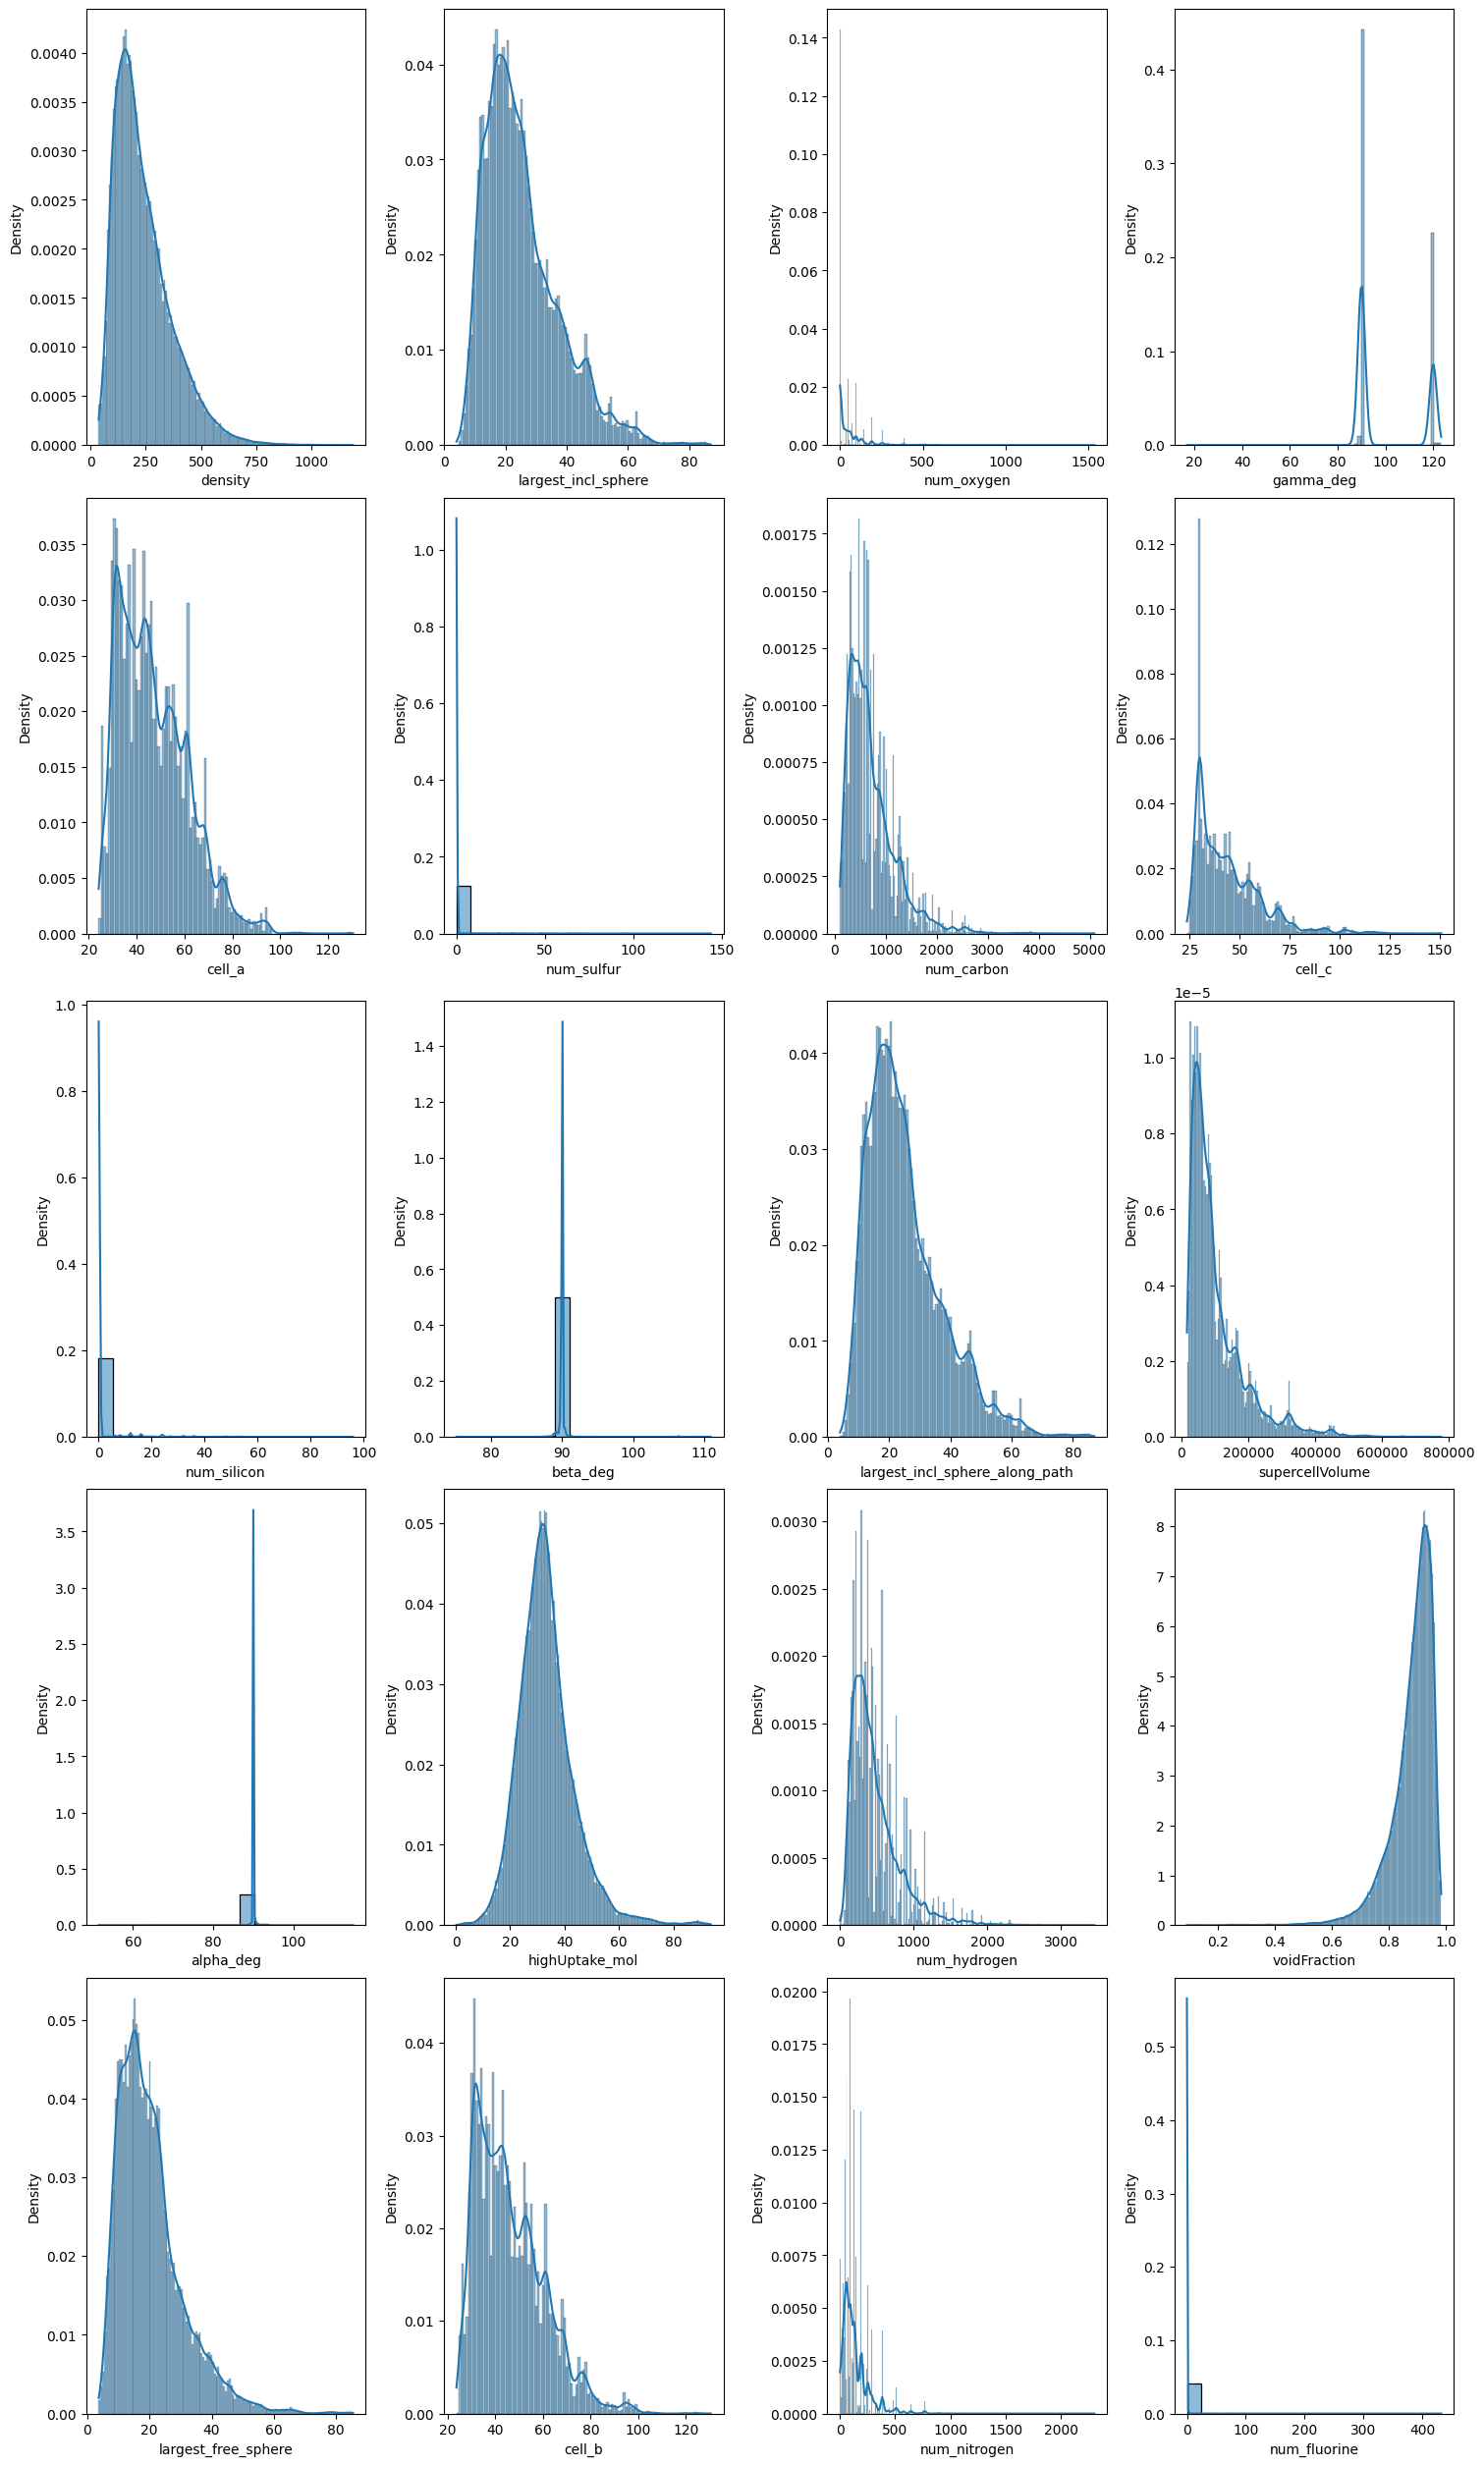

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = len(features)
num_cols = 4
num_rows = (num_features // num_cols) + int(num_features % num_cols != 0)

fig, axes = plt.subplots(
    num_rows, num_cols, figsize=(15, 5 * num_rows), constrained_layout=True
)

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, kde=True, stat="density", ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

> ✍️ **Are the numerical features normally distributed? If not, what distributions do they follow, and how might this impact model training?**

The numerical features exhibit varying distributions and do not conform to a standard normal distribution. Many of them appear to be either left- or right-skewed, and in some cases, such as `gamma_deg`, the data shows multiple modes. This indicates the need for standardization to ensure the features are on a consistent scale for model training.

### Correlation Analysis

We now analyze the correlation between different features and our target variable, as well as examine the relationships among the features themselves, to gain deeper insights.

> 💡 Use [`pandas.DataFrame.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to calculate the correlation matrix, which shows the pairwise correlations between all features and the target variable. Then, use [`seaborn.heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to visualize this matrix.
> 
> Correlation heatmaps highlight feature pairs with strong positive or negative correlations, making it easier to spot dependencies and choose features that might be most useful for your model.

<Axes: >

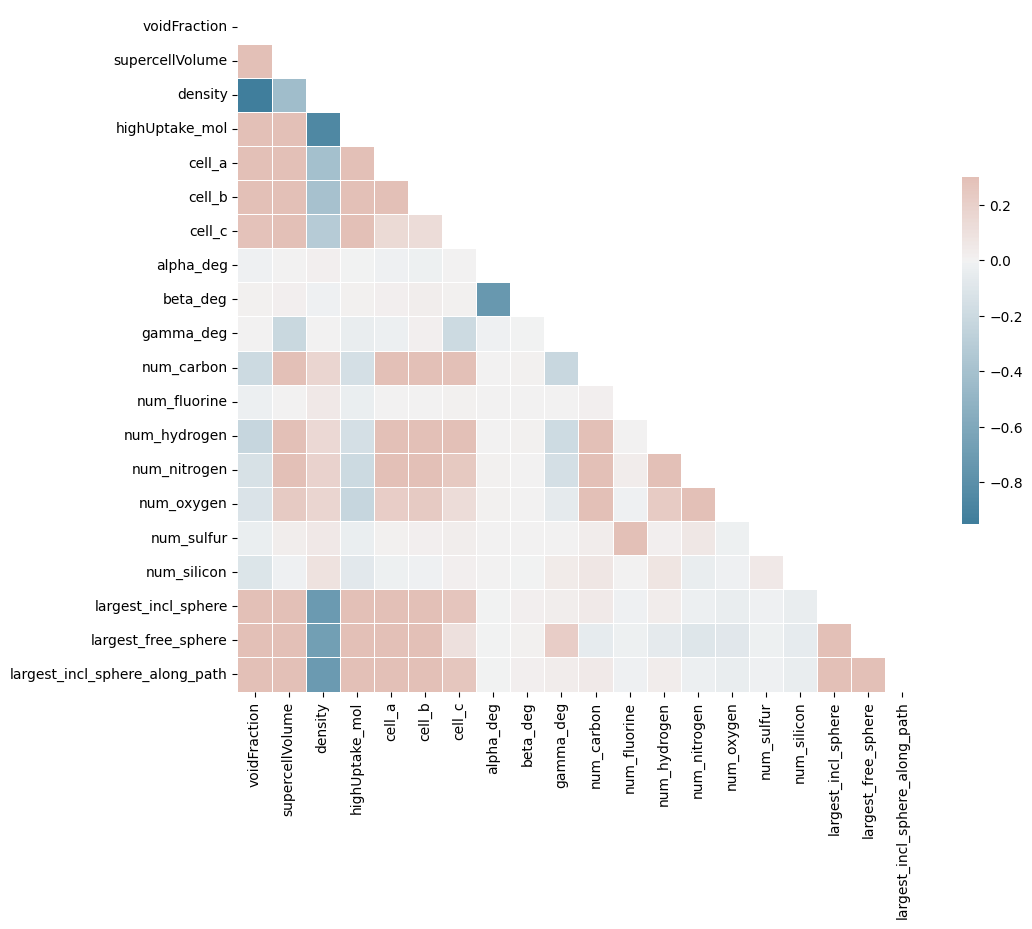

In [6]:
import numpy as np

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)


> 💡 Use [`pandas.Series.abs`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.abs.html) to filter features with weak positive or negative correlations to the target. This helps identify low-impact features, simplifying your model.

In [7]:
df.corr()[target_variable].abs().drop(target_variable).sort_values()

alpha_deg                         0.002577
beta_deg                          0.007505
num_fluorine                      0.035365
num_sulfur                        0.036241
gamma_deg                         0.037956
num_silicon                       0.077524
num_hydrogen                      0.150749
num_carbon                        0.156129
num_nitrogen                      0.195327
num_oxygen                        0.229498
cell_c                            0.346000
cell_b                            0.407787
cell_a                            0.426219
supercellVolume                   0.501954
largest_free_sphere               0.703732
largest_incl_sphere_along_path    0.754570
largest_incl_sphere               0.758167
voidFraction                      0.817779
density                           0.859088
Name: highUptake_mol, dtype: float64

> ✍️ **Are high correlations between features causing multicollinearity, and how can you address it? Can some features be omitted?**

We observe high negative correlations between several features, which can lead to multicollinearity. This issue arises when features provide redundant or conflicting information, making it difficult for the model to estimate their individual contributions. Techniques like Principal Component Analysis (PCA) can address multicollinearity by reducing dimensionality and combining correlated features, improving model performance.

Additionally, `alpha_deg` and `beta_deg` showcase near-zero correlation with the target and will therefore be omitted to streamline the model. 

### Action Plan

> ✍️ **Formulate your action plan based on your findings so far**

- The dataset contains missing values that will require handling through imputation, row deletion, or oversampling, depending on their impact on the analysis.
- Features `alpha_deg` and `beta_deg` have near-zero correlation with the target, indicating they are not relevant to methane absorption and can be excluded to streamline the dataset.
- The numerical features show varying, often skewed distributions, suggesting the need for normalization. Techniques like [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) will be explored to bring features onto a consistent scale.
- To address multicollinearity among highly correlated features we will experiment with dimensionality reduction techniques like PCA.

## ⛏️ Dataset Preprocessing

Before training our model, we will address key preprocessing steps to ensure optimal performance. These actions are necessary for standardizing the dataset, handling outliers, and improving model accuracy.

> For more details on preprocessing techniques, check out the [scikit-learn guide](https://scikit-learn.org/1.5/modules/preprocessing.html).

> 💡 To clean the dataset, use [`pandas.DataFrame.dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) to remove rows with missing values. Additionally, drop any irrelevant features using [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html). Standardization and dimensionality reduction will be incorporated into the actual ML pipeline to ensure proper scaling and to address multicollinearity.

In [8]:
df.dropna(inplace=True)
df.drop(["alpha_deg", "beta_deg"], axis=1, inplace=True)
df.head()

,voidFraction,supercellVolume,density,highUptake_mol,cell_a,cell_b,cell_c,gamma_deg,num_carbon,num_fluorine,num_hydrogen,num_nitrogen,num_oxygen,num_sulfur,num_silicon,largest_incl_sphere,largest_free_sphere,largest_incl_sphere_along_path
0,0.900120,49204.128057,260.213228,30.256085,43.4422,43.4422,30.1056,120.0,360,0,216,144,72,0,0,17.19014,15.64961,17.19004
1,0.879234,49390.074419,297.963387,28.278470,43.5205,43.5204,30.1108,120.0,360,0,216,144,144,0,0,17.34916,15.76943,17.34916
2,0.858269,50036.985281,289.397249,29.259086,43.7829,43.7829,30.1406,120.0,432,0,360,144,72,0,0,16.84032,15.61907,16.84024
3,0.857065,49135.924517,370.063633,23.500406,43.4319,43.4318,30.0782,120.0,360,0,144,216,216,0,0,13.93085,12.32167,13.93085
4,0.858016,49540.680132,367.040151,23.128289,43.6159,43.6159,30.0706,120.0,360,0,144,216,216,0,0,16.06923,13.48791,16.06921


## 🤖 Model Selection & Training